# Auswertung des Versuchs 255 zur Röntgenspektrometrie

## Pythonmodule

In [1]:
#Importieren von allen benötigten Modulen

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import io
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = 16, 9

## Aufgabe 1: Analyse des LiF-Kristalls

### Röntgenspektrum LiF-Kristall

#### Messdaten Einlesen

In [2]:
daten = open('Data/plot_a.txt').read().replace(',','.')
beta1, counts1 = np.loadtxt(io.StringIO(daten), unpack=True)
beta1=beta1*(2*np.pi/360)
# print (len(beta1), len(counts1))
counts1_err=np.sqrt(counts1)

#### Plots der Betrachteten Messdaten

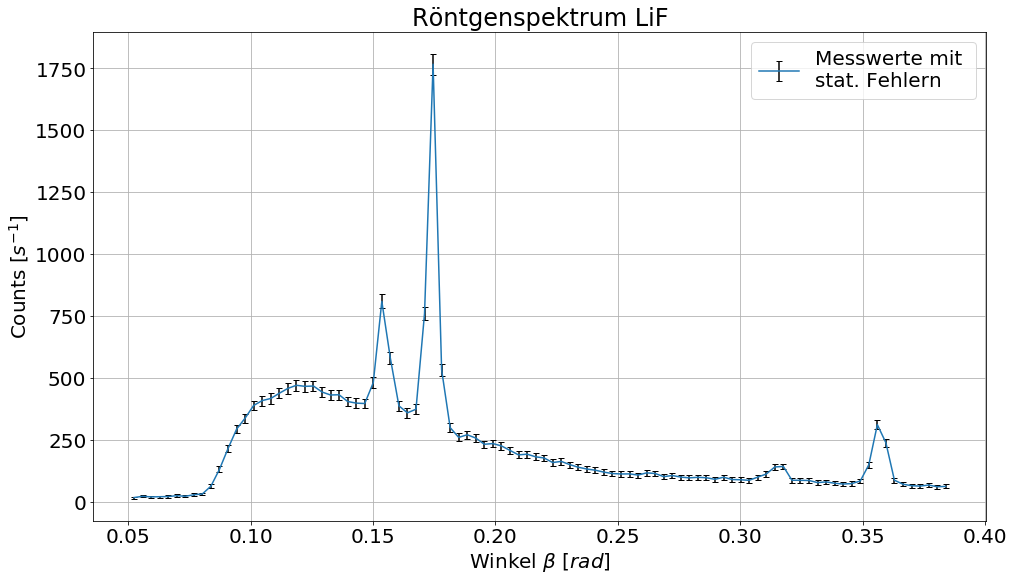

In [3]:
plt.errorbar(beta1,counts1,yerr=counts1_err,capsize=3,ecolor='black', label='Messwerte mit \nstat. Fehlern')
plt.title(r'Röntgenspektrum LiF')
plt.xlabel(r'Winkel $ \beta $ [$rad$]')
plt.ylabel(r'Counts [$s^{-1}$]')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### a) Extrapolation der Grenzwellenlänge $\lambda_{gr}$ und der Planck kosntante $h$

#### Schnittpunkt $\beta_0$ Untergrund und Anstieg

In [4]:
#Verwendete Fit-Funktionen
def linear(x,a,b):
    return a*x+b

#Fit der Messwerte

#Anstieg
popt1,pcov1=curve_fit(linear,beta1[9:13],counts1[9:13],sigma=counts1_err[9:13])
#Untergrund
popt2,pcov2=curve_fit(linear,beta1[:8],counts1[:8],sigma=counts1_err[:8])

#Schnittpunkt der beiden Geraden ergibt beta0
beta0=(popt2[1]-popt1[1])/(popt1[0]-popt2[0])
beta0_err=np.sqrt(pcov2[1,1]/(popt1[0]-popt2[0])**2+
                  pcov1[1,1]/(popt1[0]-popt2[0])**2+
                  ((popt2[1]-popt1[1])*pcov1[0,0]**0.5/(popt1[0]-popt2[0])**2)**2+
                  ((popt2[1]-popt1[1])*pcov2[0,0]**0.5/(popt1[0]-popt2[0])**2)**2)

print('Für den Schnittpunkt der beiden Geraden und damit beta_0 folgt:')
print('beta_0 = ' + str(round(beta0,5)) + ' ± ' + str(round(beta0_err,5)) + ' [rad]')

Für den Schnittpunkt der beiden Geraden und damit beta_0 folgt:
beta_0 = 0.08221 ± 0.00392 [rad]


#### Visualisierung der betrachteten Geraden

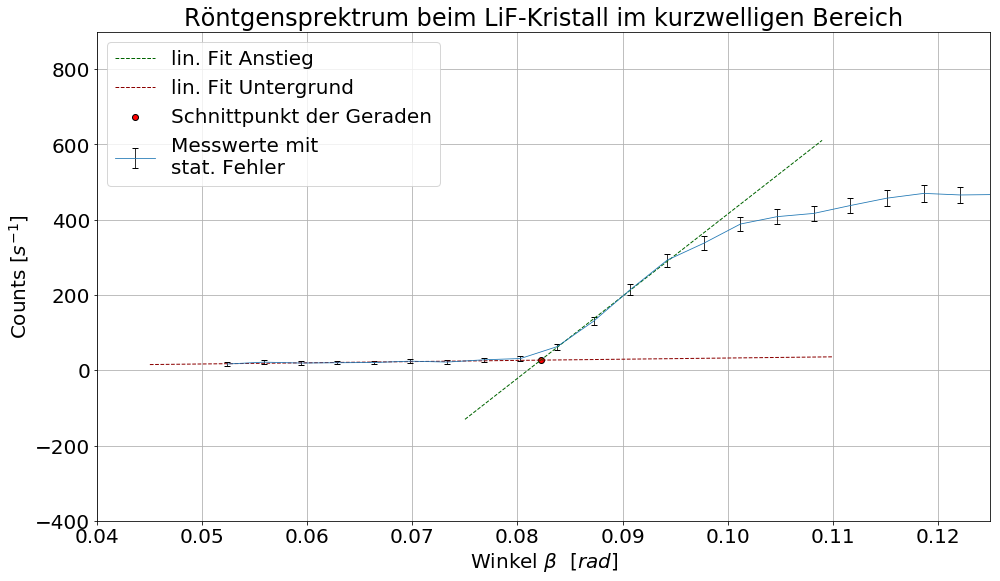

In [5]:
plt.errorbar(beta1, counts1, yerr=counts1_err,linewidth=0.8,capsize=3,ecolor='black',
             label='Messwerte mit \nstat. Fehler')
plt.plot(np.linspace(0.075,0.109,2),linear(np.linspace(0.075,0.109,2),*popt1),
         linewidth=1,linestyle='--',
         color='darkgreen',label='lin. Fit Anstieg')
plt.plot(np.linspace(0.045,0.11,2),linear(np.linspace(0.045,0.11,2),*popt2),
         linewidth=1,linestyle='--',
         color='darkred',label='lin. Fit Untergrund')
plt.xlabel(r'Winkel $ \beta$  [$rad$]')
plt.ylabel(r'Counts [$s^{-1}$]')
plt.title(r'Röntgensprektrum beim LiF-Kristall im kurzwelligen Bereich')
plt.xlim(0.04,0.125)
plt.ylim(-400,900)
plt.grid(True)

#Einzeichnen des Schnittpunktes
plt.scatter(beta0, linear(beta0,*popt1),color = 'red',
            marker='o',edgecolor='black',label='Schnittpunkt der Geraden')
plt.legend(loc='best')
plt.show()

#### Güte des Fits des Anstiegs

In [6]:
chi_squared1=np.sum((linear(beta1[9:13],*popt1)-counts1[9:13])**2/counts1_err[9:13]**2)

#Freiheitsgrade
dof1=len(beta1[9:13])-2

chi_squared1_red=chi_squared1/dof1

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi^2 = ' + str(chi_squared1))
print('chi^2_red = ' + str(chi_squared1_red))
print()

#Fitwahrscheinlichkeit
prob1=round(1-chi2.cdf(chi_squared1,dof1),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob1) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi^2 = 0.4012916762567657
chi^2_red = 0.20064583812838285

Die Fitwahrscheinlichkeit beträgt: 82.0 %


#### Güte des Fits des Untergrunds

In [7]:
chi_squared2=np.sum((linear(beta1[:8],*popt2)-counts1[:8])**2/counts1_err[:8]**2)

#Freiheitsgrade
dof2=len(beta1[:8])-2

chi_squared2_red=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi^2= ' + str(chi_squared2))
print('chi^2_red= ' + str(chi_squared2_red))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi^2= 1.1377083565425403
chi^2_red= 0.18961805942375673

Die Fitwahrscheinlichkeit beträgt: 98.0 %


#### Grenzwellenlänge $\lambda_{gr}$ aus Schnittpunkt $\beta_0$

In [8]:
d_LiF=201.4e-12 #m
d_LiF_err=0.05e-12

lambda_gr=2*d_LiF*np.sin(beta0)
lambda_gr_err=2*np.sqrt((d_LiF*np.cos(beta0)*beta0_err)**2+(d_LiF_err*np.sin(beta0))**2)

print('Daraus folgt mit der Bragg-Gleichung für die Grenzwellenlänge:')
print('lambda_gr = ' + str(round(lambda_gr,15)) + ' ± ' 
      + str(round(lambda_gr_err,15)) + ' [m]')

Daraus folgt mit der Bragg-Gleichung für die Grenzwellenlänge:
lambda_gr = 3.3079e-11 ± 1.573e-12 [m]


$$ \lambda_{gr} = (33.079 \pm 1.573) \ \text{[pm]}$$

#### Plancksches Wirkungsquantum $h$ aus $\lambda_{gr}$

In [9]:
e=1.6022e-19 #C  #https://en.wikipedia.org/wiki/ (Fehler vernachlässigbar)      
c=2.9979e8 #m/s  #https://en.wikipedia.org/wiki/Speed_of_light
U0= 35e3 #V      #Abgelesen (Fehler vernachlässigbar)

h=lambda_gr*e*U0/c
h_err=h*(lambda_gr_err/lambda_gr) 

print('Für das Plancksche Wirkungsquantum h folgt:')
print('h = (' + str(h) + ' ± ' + str(h_err) + ') Js')
print()

#Vergleich mit dem Literaturwert
h_lit=6.62607015e-34 #Js #https://en.wikipedia.org/wiki/Planck_constant

sig = abs(h-h_lit)/np.sqrt((h_err)**2)
print('damit liegen wir im ' + str(round(sig,3)) + ' sigma-Bereich vom Literaturwert')

Für das Plancksche Wirkungsquantum h folgt:
h = (6.187532245449362e-34 ± 2.9424559959610894e-35) Js

damit liegen wir im 1.49 sigma-Bereich vom Literaturwert


\begin{align*}
h       &= (6.188 \pm 0.294) \cdot 10^{-34} \ \text{[Js]}\\
h_{lit} &= 6.62607015        \cdot 10^{-34} \ \text{[Js]}\\
        & \Rightarrow 1.49 \sigma \ \text{Abweichung}
\end{align*}

#### Spektrum zweiter Ordnung
mit dem Bragg'schen Gesetz folgt die Beziehung zwischen $\theta_1$ und $\theta_2$ zu:

$$
\frac{sin(\theta_1)}{sin(\theta_2)} = \frac{n_1}{n_2} = \frac{1}{2}
$$

In [10]:
theta2=np.arcsin(2*np.sin(beta0))
theta2_err=2*np.cos(beta0)*(2*np.cos(2*beta0)-1)**(-0.5)*beta0_err
print('Das Spektrum zweiter Ordnung setzt bei folgendem Winkel ein:')
print('theta2 = ' + str(theta2) + ' ± ' + str(theta2_err) + ' [rad]')

Das Spektrum zweiter Ordnung setzt bei folgendem Winkel ein:
theta2 = 0.1649918863541537 ± 0.007917995139816284 [rad]


$$
\theta_2 = (0.165 \pm 0.008) \ \text{[rad]}
$$

### b) Analyse der $K_{\alpha}$- und $K_{\beta}$-Linien

#### Importieren der Messdaten

In [11]:
daten = open('Data/1O alph beta.txt').read().replace(',','.')
beta2, counts2 = np.loadtxt(io.StringIO(daten), unpack=True)
beta2=beta2*(2*np.pi/360)
#print (len(beta2), len(counts2))
counts2_err=np.sqrt(counts2)

daten = open('Data/2O alpha.txt').read().replace(',','.')
beta3, counts3 = np.loadtxt(io.StringIO(daten), unpack=True)
beta3=beta3*(2*np.pi/360)
#print (len(beta3), len(counts3))
counts3_err=np.sqrt(counts3)

daten = open('Data/2O beta.txt').read().replace(',','.')
beta3_1, counts3_1 = np.loadtxt(io.StringIO(daten), unpack=True)
beta3_1=beta3_1*(2*np.pi/360)
#print (len(beta3_1), len(counts3_1))
counts3_1_err=np.sqrt(counts3_1)

beta3 = np.array([*beta3,  *beta3_1])
counts3 = [*counts3, *counts3_1]
counts3_err = [*counts3_err, *counts3_1_err]
#print (len(beta3), len(counts3))

#daten = open('Data/forged 2O alph beta.txt').read().replace(',','.')
#beta3, counts3 = np.loadtxt(io.StringIO(daten), unpack=True)
#beta3=beta3*(2*np.pi/360)
#print (len(beta3), len(counts3))
#counts3_err=np.sqrt(counts3)

#### Fit der Messdaten

In [12]:
def gaussian(x, A, mu, sig, y0):
    return y0 + (A*np.exp(-(x-mu)**2/(2*sig**2)))

#Berücksichtung des Untergrunds
def gauß_optimiert(x, a, c, A1, mu1, sig1, A2, mu2, sig2):
    return linear(x, a, c)+gaussian(x, A1, mu1, sig1, 0)+gaussian(x, A2, mu2, sig2, 0)

popt3,pcov3=curve_fit(gauß_optimiert,beta2,counts2,sigma=counts2_err,
                      p0=[7000,2000,1000,0.155,0.003,2300,0.178,0.003])

popt4,pcov4=curve_fit(gauß_optimiert,beta3,counts3,sigma=counts3_err,
                      p0=[400,300,40,0.308,0.003,200,0.35,0.003], maxfev=5000)

#### Plot der Messdaten

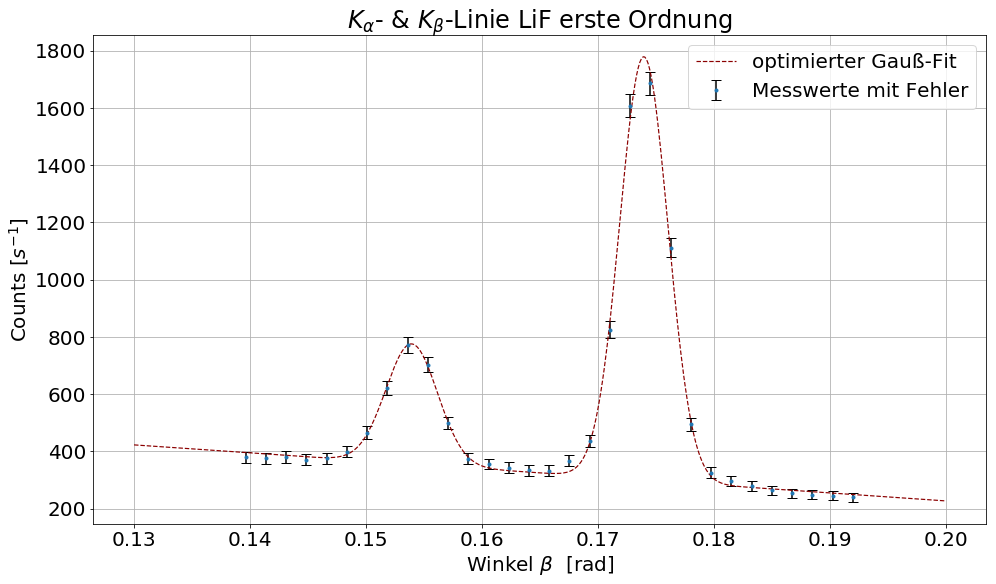

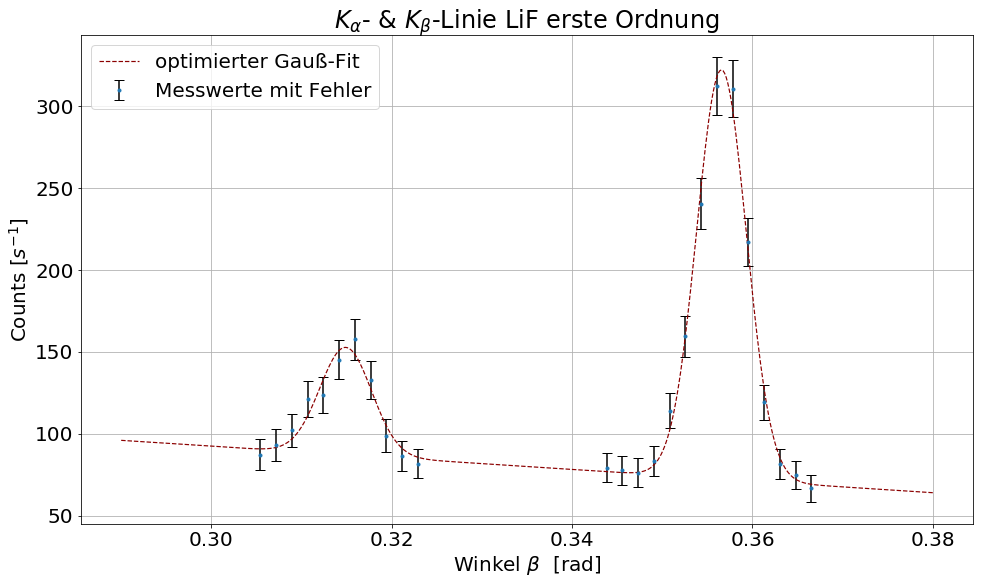

In [13]:
plt.errorbar(beta2, counts2, yerr=counts2_err, linestyle='', marker='.', 
             ecolor = 'black', capsize = 5, label='Messwerte mit Fehler')
plt.plot(np.linspace(0.13,0.20,500),gauß_optimiert(np.linspace(0.13,0.20,500),*popt3),
         linewidth=1.2, linestyle='--', color='darkred', label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $ \beta$  [rad]')
plt.ylabel(r'Counts [$s^{-1}$]')
plt.title(r'$K_\alpha$- & $K_\beta$-Linie LiF erste Ordnung')
plt.grid(True)
plt.legend(loc='best')
plt.show()
print('\n')
plt.errorbar(beta3, counts3, yerr=counts3_err, linestyle='', marker='.', 
             ecolor = 'black', capsize = 5, label='Messwerte mit Fehler')
plt.plot(np.linspace(0.29,0.38,500),gauß_optimiert(np.linspace(0.29,0.38,500),*popt4),
         linewidth=1.2, linestyle='--', color='darkred', label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $ \beta$  [rad]')
plt.ylabel(r'Counts [$s^{-1}$]')
plt.title(r'$K_\alpha$- & $K_\beta$-Linie LiF erste Ordnung')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### Güte der Fits

In [14]:
print('----- erste Ordnung -----')
print()
chi_squared3=np.sum((gauß_optimiert(beta2,*popt3)-counts2)**2/counts2_err**2)

#Freiheitsgrade
dof3=len(beta2)-8

chi_squared3_red=chi_squared3/dof3

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared3))
print('chi_squared_red= ' + str(chi_squared3_red))
print()

#Fitwahrscheinlichkeit
prob3=round(1-chi2.cdf(chi_squared3,dof3),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob3) + ' %')
print()
print('----- zweite Ordnung -----')
print()
chi_squared4=np.sum(np.power((gauß_optimiert(beta3,*popt4)-counts3),2)/
                    (np.power(counts3_err,2)))

#Freiheitsgrade
dof4 = len(beta3)-8

chi_squared4_red=chi_squared4/dof4

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared4))
print('chi_squared_red= ' + str(chi_squared4_red))
print()

#Fitwahrscheinlichkeit
prob4=round(1-chi2.cdf(chi_squared4,dof4),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob4) + ' %')

----- erste Ordnung -----

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 14.562812770384156
chi_squared_red= 0.6331657726253981

Die Fitwahrscheinlichkeit beträgt: 91.0 %

----- zweite Ordnung -----

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 7.521827301313788
chi_squared_red= 0.44246042948904635

Die Fitwahrscheinlichkeit beträgt: 98.0 %


#### Bestimmung Winkel der $K_{\alpha}$- und $K_{\beta}$-Linien

Die gesuchtengesuchten Winkel $\theta_{\alpha}$, $\theta_{\beta}$ entsprechen den Mittelwerten $\mu_1$ $\mu_2$ der Gaußkurven

In [15]:
print('-----erste Ordnung -----')
print()
print('K_alpha_1: ' + str(popt3[6]) + ' ± ' + str(popt3[7]) + ' [rad]' )
print('K_beta_1: ' + str(popt3[3]) + ' ± ' + str(popt3[4]) + ' [rad]' )
print()
print('----- zweite Ordnung -----')
print()
print('K_alpha_2: ' + str(popt4[6]) + ' ± ' + str(popt4[7]) + ' [rad]' )
print('K_beta_2: ' + str(popt4[3]) + ' ± ' + str(-popt4[4]) + ' [rad]' )
print()

-----erste Ordnung -----

K_alpha_1: 0.1739691022320038 ± 0.002072978588296099 [rad]
K_beta_1: 0.15394545915465743 ± 0.0022271472023520545 [rad]

----- zweite Ordnung -----

K_alpha_2: 0.3565709571049988 ± 0.0027436679940068265 [rad]
K_beta_2: 0.31490447666550997 ± 0.002875820843552091 [rad]



\begin{align*}
\theta_{\alpha}^1 &= (0.174 \pm 0.002) \ \text{[rad]}\\
\theta_{\beta}^1  &= (0.154 \pm 0.002) \ \text{[rad]}
\end{align*}

\begin{align*}
\theta_{\alpha}^2 &= (0.357 \pm 0.003) \ \text{[rad]}\\
\theta_{\beta}^2  &= (0.315 \pm 0.003) \ \text{[rad]}
\end{align*}

#### Bestimmung der Wellenlängen $\lambda_\alpha$,$\lambda_\beta$ der $K_{\alpha}$- und $K_{\beta}$-Linien

In [16]:
lambdaK_beta1=2*d_LiF*np.sin(popt3[3])
lambdaK_beta1_err=2*np.sqrt((d_LiF*np.cos(popt3[3])*popt3[4])**2+
                            (d_LiF_err*np.sin(popt3[3]))**2)

lambdaK_alpha1=2*d_LiF*np.sin(popt3[6])
lambdaK_alpha1_err=2*np.sqrt((d_LiF*np.cos(popt3[6])*popt3[7])**2+
                             (d_LiF_err*np.sin(popt3[6]))**2)

print('-----erste Ordnung -----')
print()
print('Daraus ergeben sich die korrespondierenden Wellenlängen')
print('K_alpha_1:  ' + str(lambdaK_alpha1*1e12) + ' ± ' 
      + str(lambdaK_alpha1_err*1e12) + ' [pm]' )
print('K_beta_1:  ' + str(lambdaK_beta1*1e12) + ' ± ' 
      + str(lambdaK_beta1_err*1e12) + ' [pm]' )

lambdaK_beta2=d_LiF*np.sin(popt4[3])
lambdaK_beta2_err=np.sqrt((d_LiF*np.cos(popt4[3])*popt4[4])**2+
                          (d_LiF_err*np.sin(popt4[3]))**2)

lambdaK_alpha2=d_LiF*np.sin(popt4[6])
lambdaK_alpha2_err=np.sqrt((d_LiF*np.cos(popt4[6])*popt4[7])**2+
                           (d_LiF_err*np.sin(popt4[6]))**2)

print()
print('----- zweite Ordnung -----')
print()
print('Daraus ergeben sich die korrespondierenden Wellenlängen')
print('K_alpha_2:  ' + str(lambdaK_alpha2*1e12) + ' ± ' 
      + str(lambdaK_alpha2_err*1e12) + ' [pm]' )
print('K_beta_2:  ' + str(lambdaK_beta2*1e12) + ' ± ' 
      + str(lambdaK_beta2_err*1e12) + ' [pm]' )
print()

-----erste Ordnung -----

Daraus ergeben sich die korrespondierenden Wellenlängen
K_alpha_1:  69.72181724627963 ± 0.8225740728051693 [pm]
K_beta_1:  61.764592774243354 ± 0.8866182597670368 [pm]

----- zweite Ordnung -----

Daraus ergeben sich die korrespondierenden Wellenlängen
K_alpha_2:  70.3012757400618 ± 0.5181114342955249 [pm]
K_beta_2:  62.37874521994594 ± 0.5509268942835379 [pm]




\begin{align*}
\lambda_{\alpha}^1 &= (69.722 \pm 0.823) \ \text{[pm]}\\
\lambda_{\beta}^1  &= (69.765 \pm 0.887) \ \text{[pm]}
\end{align*}

\begin{align*}
\lambda_{\alpha}^2 &= (70.301 \pm 0.518) \ \text{[pm]}\\
\lambda_{\beta}^2  &= (62.379 \pm 0.551) \ \text{[pm]}
\end{align*}

#### Vergleich mit Literaturwerten

In [17]:
lambdaK_alphalit=71.1e-12 #m
lambdaK_betalit=63.1e-12 #m

diffalpha1=np.abs(lambdaK_alpha1-lambdaK_alphalit)
diffbeta1=np.abs(lambdaK_beta1-lambdaK_betalit)

print('-----erste Ordnung -----')
print()
print('Der Vergleich mit den Literaturwerten liefert:')
print()
print('∆lambdaK_alpha1 = '+str(diffalpha1*1e12) + ' ± '+str(lambdaK_alpha1_err*1e12)+
      ' [pm] \n=> sigma = '+str(round(diffalpha1/lambdaK_alpha1_err,2)))
print('∆lambdaK_beta1 = '+str(diffbeta1*1e12)+' ± '+str(lambdaK_beta1_err*1e12)+
      ' [pm] \n=> sigma = '+str(round(diffbeta1/lambdaK_beta1_err,2)))

diffalpha2=np.abs(lambdaK_alpha2-lambdaK_alphalit)
diffbeta2=np.abs(lambdaK_beta2-lambdaK_betalit)

print()
print('----- zweite Ordnung -----')
print()
print('Der Vergleich mit den Literaturwerten liefert:')
print()
print('∆lambdaK_alpha2 ='+str(diffalpha2*1e12) + ' ± '+str(lambdaK_alpha2_err*1e12)+
      ' [pm] \n=> sigma = '+str(round(diffalpha2/lambdaK_alpha2_err,2)))
print('∆lambdaK_beta2 ='+str(diffbeta2*1e12) + ' ± '+str(lambdaK_beta2_err*1e12)+
      ' [pm] \n=> sigma = '+str(round(diffbeta2/lambdaK_beta2_err,2)))
print()

-----erste Ordnung -----

Der Vergleich mit den Literaturwerten liefert:

∆lambdaK_alpha1 = 1.3781827537203795 ± 0.8225740728051693 [pm] 
=> sigma = 1.68
∆lambdaK_beta1 = 1.3354072257566372 ± 0.8866182597670368 [pm] 
=> sigma = 1.51

----- zweite Ordnung -----

Der Vergleich mit den Literaturwerten liefert:

∆lambdaK_alpha2 =0.7987242599382116 ± 0.5181114342955249 [pm] 
=> sigma = 1.54
∆lambdaK_beta2 =0.7212547800540509 ± 0.5509268942835379 [pm] 
=> sigma = 1.31



#### Halbwersbreite für $K_\alpha$ in erster Ordnung

$$
\text{FWHM} = 2 \cdot \sqrt{2\ln(2)}\cdot \sigma \approx 2.4\sigma
$$

In [18]:
FWHM_K_alpha1=2*np.sqrt(2*np.log(2))*popt3[7] #rad
FWHM_K_alpha1_err=2*np.sqrt(2*np.log(2))*pcov3[7,7]**0.5

FWHM2_K_alpha1=2*d_LiF*np.sin(FWHM_K_alpha1) #m
FWHM2_K_alpha1_err=2*np.sqrt((d_LiF*np.cos(FWHM_K_alpha1)*FWHM_K_alpha1_err)**2+
                             (d_LiF_err*np.sin(FWHM_K_alpha1))**2)

print('Aus dem Fit folgt für die Halbwertsbreite: ')
print('FWHM_K_alpha1 = ' + str(FWHM_K_alpha1) + ' ± ' + 
      str(FWHM_K_alpha1_err) + ' [rad]' )
print('              = ' + str(FWHM2_K_alpha1*1e12) + ' ± ' + 
      str(FWHM2_K_alpha1_err*1e12) + ' [pm]' )

Aus dem Fit folgt für die Halbwertsbreite: 
FWHM_K_alpha1 = 0.004881491532639614 ± 7.294787730890395e-05 [rad]
              = 1.9662569803491743 ± 0.02938710946201914 [pm]


 \begin{align*}
 \text{FWHM} =& 2 \sqrt{2 \ln{2}}\cdot\sigma \\
             =& (4.881 \pm 0.073) \cdot 10^{-3} \ \text{[rad]}\\
             =& (1.966 \pm 0.029)  \ \text{[pm]}
 \end{align*}

### c) Bestimmung der Einsatzspannung $U_E$ und erneute Bestimmung von $h$

#### Einlesen der Messdaten

In [20]:
daten = open('Data/Spannungen LiF.txt').read()
U, counts4 = np.loadtxt(io.StringIO(daten), unpack=True)
#print (len(U), len(counts4))
counts4_err=np.sqrt(counts4)

#### Messdaten plot und Fit

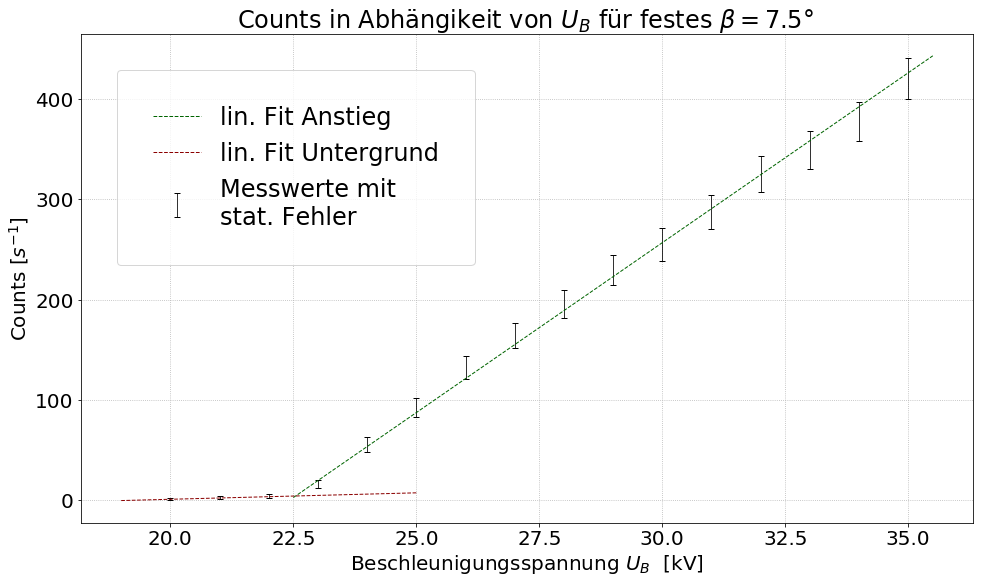

In [21]:
#linearer Anstieg
popt5,pcov5=curve_fit(linear,U[3:],counts4[3:],sigma=counts4_err[3:])

#Untergrund
popt6,pcov6=curve_fit(linear,U[:3],counts4[:3],sigma=counts4_err[:3])

#Plot der Messdaten
plt.errorbar(U, counts4, yerr=counts4_err,linestyle='',
             linewidth=0.8,capsize=3,ecolor='black',
             label='Messwerte mit \nstat. Fehler')
plt.xlabel(r'Beschleunigungsspannung $U_B$  [kV]')
plt.ylabel(r'Counts [$s^{-1}$]')
plt.title(r'Counts in Abhängikeit von $U_B$ für festes $\beta=7.5$° ')
plt.grid(ls='dotted')
#Fit linearer Anstieg
plt.plot(np.linspace(22.5,35.5,2),linear(np.linspace(22.5,35.5,2),*popt5),
         linewidth=1,linestyle='--', color='darkgreen',label='lin. Fit Anstieg')

#Fit Untergrund
plt.plot(np.linspace(19,25,2),linear(np.linspace(19,24,2),*popt6),
         linewidth=1,linestyle='--', color='darkred',label='lin. Fit Untergrund')


plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc=2)
plt.show()

In [22]:
#Güte des Fits des Anstiegs
chi_squared5=np.sum((linear(U[3:],*popt5)-counts4[3:])**2/counts4_err[3:]**2)

#Freiheitsgrade
dof5=len(counts4[3:])-2

chi_squared5_red=chi_squared5/dof5

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared5))
print('chi_squared_red= ' + str(chi_squared5_red))
print()

#Fitwahrscheinlichkeit
prob5=round(1-chi2.cdf(chi_squared5,dof5),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob5) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 3.738068440877467
chi_squared_red= 0.33982440371613337

Die Fitwahrscheinlichkeit beträgt: 98.0 %


In [23]:
#Güte des Fits des Untergrundes
chi_squared6=np.sum((linear(U[:3],*popt6)-counts4[:3])**2/counts4_err[:3]**2)

#Freiheitsgrade
dof6=len(counts4[:3])-2

chi_squared6_red=chi_squared6/dof6

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared6))
print('chi_squared_red= ' + str(chi_squared6_red))
print()

#Fitwahrscheinlichkeit
prob6=round(1-chi2.cdf(chi_squared6,dof6),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob6) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 0.037878787878788484
chi_squared_red= 0.037878787878788484

Die Fitwahrscheinlichkeit beträgt: 85.0 %


#### Bestimmung der Grenzspannung $U_{gr} = U_E$

In [24]:
#Schnittpunkt der beiden Geraden ergibt Spannungsgrenze
UE=(popt6[1]-popt5[1])/(popt5[0]-popt6[0])
UE_err=np.sqrt(pcov6[1,1]/(popt5[0]-popt6[0])**2+
               pcov5[1,1]/(popt5[0]-popt6[0])**2+
               ((popt6[1]-popt5[1])*pcov5[0,0]**0.5/(popt5[0]-popt6[0])**2)**2+
               ((popt6[1]-popt5[1])*pcov6[0,0]**0.5/(popt5[0]-popt6[0])**2)**2)

print('Für den Schnittpunkt der beiden Geraden und damit UE folgt:')
print('UE = ' + str(UE) + ' ± ' + str(UE_err) + ' kV')

Für den Schnittpunkt der beiden Geraden und damit UE folgt:
UE = 22.573812665968376 ± 0.555365114387099 kV


#### Bestimmung von $h$ aus Einsatzspannung $U_E$

In [25]:
#Wellenlänge für theta=7.5°
lambda_U=2*d_LiF*np.sin(7.5*(2*np.pi)/360)
lambda_U_err=2*d_LiF_err*np.sin(7.5*(2*np.pi)/360)

#Daraus folgt mit UE und Gl.(1):
h2=lambda_U*e*(UE*1e3)/c
h2_err=h2*np.sqrt((lambda_U_err/lambda_U)**2+(UE_err/UE)**2)

print('Wir erhalten aus der Bestimmung der Betriebsspannung:')
print('h = ' + str(h2) + ' ± ' + str(h2_err) + ' [Js]')
print()

#Vergleich mit dem Literaturwert
h_lit=6.62607015e-34 #Js #https://en.wikipedia.org/wiki/Planck_constant

sig = abs(h2-h_lit)/np.sqrt((h2_err)**2)
print('damit liegen wir im ' + str(round(sig,3)) + 'sigma-Bereich vom Literaturwert')

Wir erhalten aus der Bestimmung der Betriebsspannung:
h = 6.342955032056667e-34 ± 1.5605849794556506e-35 [Js]

damit liegen wir im 1.814sigma-Bereich vom Literaturwert


\begin{align*}
h       &= (6.343 \pm 1.561) \cdot 10^{-34} \ \text{[Js]}\\
h_{lit} &= 6.62607015        \cdot 10^{-34} \ \text{[Js]}\\
        & \Rightarrow 1.814 \sigma \ \text{Abweichung}
\end{align*}

## Aufgabe 2: Analyse des NaCl-Kristalls

### Röntgenspektrum NaCl-Kristall

#### Einlesen der Messdaten

In [26]:
daten = open('Data/plot_NaCl.txt').read().replace(',','.')
beta4, counts5 = np.loadtxt(io.StringIO(daten), unpack=True)
beta4=beta4*(2*np.pi/360)
#print (len(beta4), len(counts5))
counts5_err=np.sqrt(counts5)

#### Plot der Messdaten

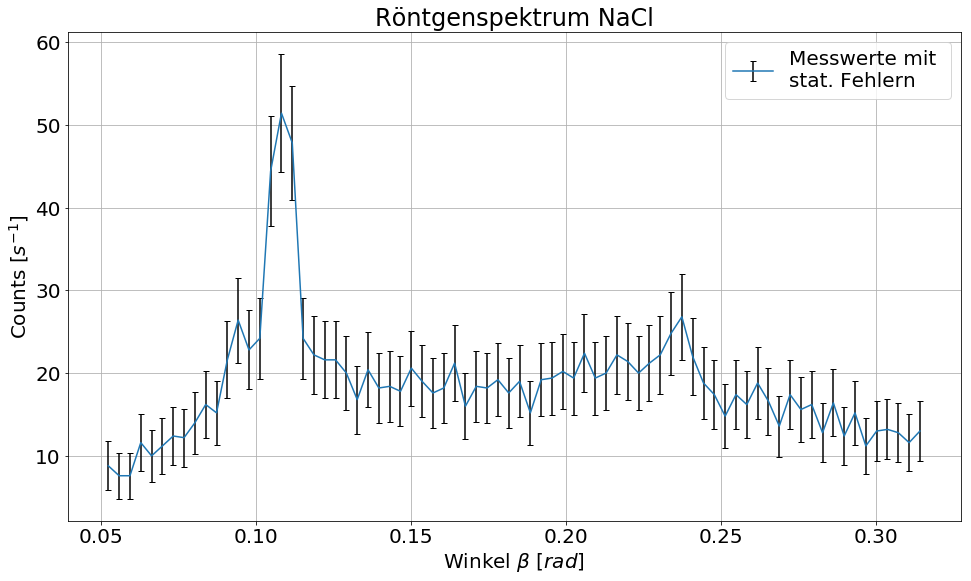

In [27]:
plt.errorbar(beta4,counts5,yerr=counts5_err,capsize=3,ecolor='black', 
             label='Messwerte mit \nstat. Fehlern')
plt.title(r'Röntgenspektrum NaCl')
plt.xlabel(r'Winkel $ \beta $ [$rad$]')
plt.ylabel(r'Counts [$s^{-1}$]')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Ermittlung der Wellenlänge der $K_\alpha$- und $K_\beta$-Linien

#### Fit der Messdaten

In [28]:
mask1=np.all([beta4>0.095, beta4<0.142],axis=0)
popt7,pcov7=curve_fit(gauß_optimiert,beta4[mask1],counts5[mask1],
                      sigma=counts5_err[mask1],
                      p0=[7000,2180,500,0.111,0.002,2180,0.1253,0.002])

mask2=np.all([beta4>0.21, beta4<0.27],axis=0)
popt8,pcov8=curve_fit(gauß_optimiert,beta4[mask2],counts5[mask2],
                      sigma=counts5_err[mask2],
                      p0=[400,280,200,0.225,0.002,280,0.2538,0.002])

#### Plot der Messdaten

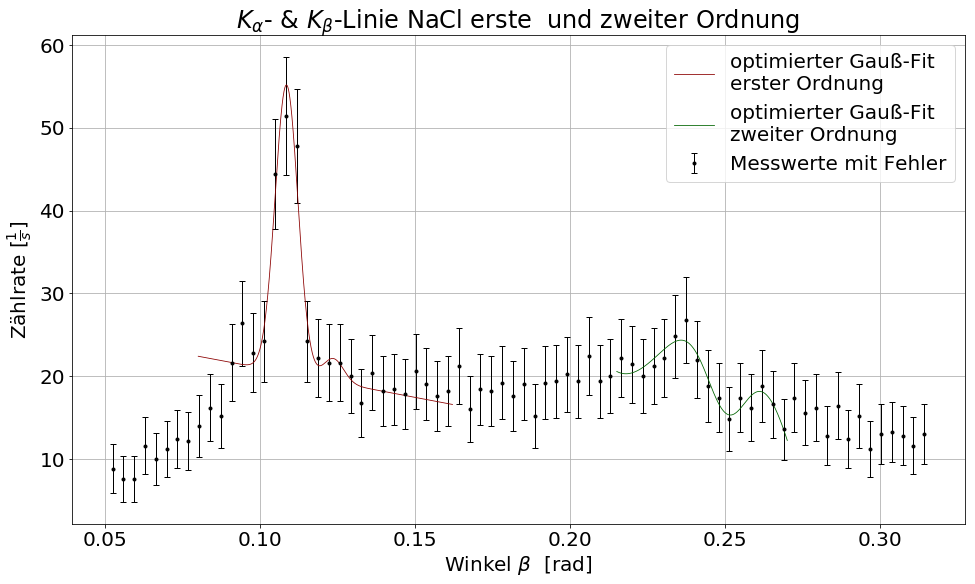

In [33]:
plt.errorbar(beta4, counts5, yerr=counts5_err,
             linewidth=1,linestyle=' ',marker='.',color='black',capsize=3,
             label='Messwerte mit Fehler')

x=np.linspace(0.08,0.162,1000)
plt.plot(x,gauß_optimiert(x,*popt7),
         linewidth=0.8,color='darkred',
         label='optimierter Gauß-Fit \nerster Ordnung')

x=np.linspace(0.215,0.27,1000)
plt.plot(x,gauß_optimiert(x,*popt8),
         linewidth=0.8,color='darkgreen',
         label='optimierter Gauß-Fit \nzweiter Ordnung')

plt.xlabel(r'Winkel $\beta$  [rad]')
plt.ylabel(r'Zählrate [$\frac{1}{s}$]')
plt.title(r'$K_\alpha$- & $K_\beta$-Linie NaCl erste  und zweiter Ordnung')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### Güte des Fits 

In [34]:
chi_squared7=np.sum((gauß_optimiert(beta4[mask1],*popt7)-counts5[mask1])**2/
                    counts5_err[mask1]**2)

#Freiheitsgrade
dof7=len(beta4[mask1])-8

chi_squared7_red=chi_squared7/dof7

print('----- erste Ordnung -----')
print()

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared7))
print('chi_squared_red= ' + str(chi_squared7_red))
print()

#Fitwahrscheinlichkeit
prob7=round(1-chi2.cdf(chi_squared7,dof7),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob7) + ' %')
print()

chi_squared8=np.sum((gauß_optimiert(beta4[mask2],*popt8)-counts5[mask2])**2/counts5_err[mask2]**2)

#Freiheitsgrade
dof8=len(beta4[mask2])-8

chi_squared8_red=chi_squared8/dof8

print('----- zweite Ordnung -----')
print()

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared8))
print('chi_squared_red= ' + str(chi_squared8_red))
print()

#Fitwahrscheinlichkeit
prob8=round(1-chi2.cdf(chi_squared8,dof8),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob8) + ' %')
print()

----- erste Ordnung -----

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 1.6875994953420088
chi_squared_red= 0.33751989906840174

Die Fitwahrscheinlichkeit beträgt: 89.0 %

----- zweite Ordnung -----

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 1.0464978654824737
chi_squared_red= 0.11627754060916375

Die Fitwahrscheinlichkeit beträgt: 100.0 %



#### Lage der $K_\alpha$- und $K_\beta$-Linien

In [35]:
#gesuchte Winkel entsprechen Mittelwerten der Gaußkurven
print('----- erste Ordnung -----')
print()
print('K_alpha_1: ' + str(popt7[6]) + ' ± ' + str(popt7[7]) + ' [rad]' )
print('K_beta_1:  ' + str(popt7[3]) + ' ± ' + str(popt7[4]) + '  [rad]' )
print()
print('----- zweite Ordnung -----')
print()
print('K_alpha_2: ' + str(popt8[6]) + ' ± ' + str(popt8[7]) + ' [rad]' )
print('K_beta_2:  ' + str(popt8[3]) + ' ± ' + str(popt8[4]) + '  [rad]' )
print()

----- erste Ordnung -----

K_alpha_1: 0.1236323960646607 ± 0.0033032925700568886 [rad]
K_beta_1:  0.10846890046651929 ± 0.003674820189155608  [rad]

----- zweite Ordnung -----

K_alpha_2: 0.25051044143387075 ± 0.006767633264233576 [rad]
K_beta_2:  0.19528806362414594 ± 0.03571527464318335  [rad]



\begin{align*}
\theta_{\alpha}^1 &= (0.124 \pm 0.003) \ \text{[rad]}\\
\theta_{\beta}^1  &= (0.108 \pm 0.004) \ \text{[rad]}
\end{align*}

\begin{align*}
\theta_{\alpha}^2 &= (0.250 \pm 0.007) \ \text{[rad]}\\
\theta_{\beta}^2  &= (0.195 \pm 0.004) \ \text{[rad]}
\end{align*}

### Gitterkonstante von NaCl

In [38]:
#Wellenlängen von K_alpha und K_beta aus Aufgabe 1b) 
#(sowohl erste, als auch zweite Ordnung)

K_a1=lambdaK_alpha1
K_b1=lambdaK_beta1
K_a2=lambdaK_alpha2
K_b2=lambdaK_beta2

lam=np.array([K_a1,K_b1,K_a2,K_b2])
lam_err=np.array([lambdaK_alpha1_err,lambdaK_beta1_err,
                  lambdaK_alpha2_err,lambdaK_beta2_err])

#mit dem Bragg-Gesetz gilt für die Gitterkonstante: a=2*d=n*lam/sin(theta)
n=np.array([1,1,2,2])
theta=np.array([popt7[6],popt7[3],popt8[6],popt8[3]])
theta_err=np.array([popt7[7],popt7[4],popt8[7],popt8[4]])
a=n*lam/np.sin(theta)
a_err=a*np.sqrt((lam_err/lam)**2+(theta_err/np.tan(theta))**2)

a_mean=np.mean(a)
a_mean_err=1/4*np.sum(a_err**2)**0.5
a_mean_std=1/np.sqrt(len(a))*np.std(a)

print('Es ergibt sich eine (gemittelte) Gitterkonstante von:')
print('a_mean = ',round(a_mean*1e12,2),' ± ',
      round(a_mean_err*1e12,2),'(sys.) ± ',
      round(a_mean_std*1e12,2),'(stat.) [pm]')

Es ergibt sich eine (gemittelte) Gitterkonstante von:
a_mean =  586.5  ±  30.06 (sys.) ±  16.31 (stat.) [pm]


\begin{align*}
a_{mean} = (586.5 \pm 46.37) \ \text{[pm]}
\end{align*}

### Bestimmung der Avodagadro-Konstante $N_A$

In [39]:
#Dichte NaCl
rho=2.164e3 #kg/(m**3)
rho_err=0.0005e3

#Molekulargewicht NaCl
M=58.44e-3 #kg
M_err=0.005e-3

#Nach Skript gilt: N_A=0.5*M/(rho*d**3)=4*M/(rho*a**3)
N_A=4*M/(rho*a_mean**3)
N_A_err=N_A*np.sqrt((M_err/M)**2+(rho_err/rho)**2+(3*a_mean_err/a_mean)**2)
N_A_std=N_A*3*a_mean_std/a_mean

print('Die Avogadro-Zahl ergibt sich zu:')
print('N_A = ',round(N_A*1e-23,4),' ± ',
      round(N_A_err*1e-23,4),' (sys.) ± ',
      round(N_A_std*1e-23,4),' (stat.) 10^23 [1/mol]')
print()

#Vergleich mit dem Literaturwert
N_A_lit=6.02214076e23 #1/mol  #https://en.wikipedia.org/wiki/Avogadro_constant

diff_N_A=np.abs(N_A_lit-N_A)
print('Der Vergleich mit dem Literaturwert liefert:')
sig = abs(N_A-N_A_lit)/np.sqrt((N_A_err**2 - N_A_std**2))
print('damit liegen wir im ' + str(round(sig,3)) + ' sigma-Bereich vom Literaturwert')

Die Avogadro-Zahl ergibt sich zu:
N_A =  5.3542  ±  0.8233  (sys.) ±  0.4467  (stat.) 10^23 [1/mol]

Der Vergleich mit dem Literaturwert liefert:
damit liegen wir im 0.966 sigma-Bereich vom Literaturwert


\begin{align*}
N_A &= (5.354 \pm 1.270) \cdot 10^{23} \ \text{[1/mol]}\\
N_A^{lit} &= (6.02214076) \cdot 10^{23} \ \text{[1/mol]}\\
& \Rightarrow 0.966 \sigma \ \text{Abweichung}
\end{align*}